In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

print(tf.__version__)

2.5.0


In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
from zipfile import ZipFile
file_name = "Images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


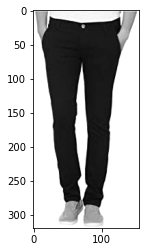

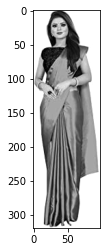

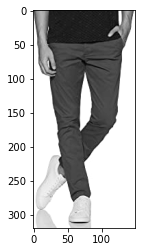

In [2]:

DATADIR = "Scrapped Images"
CATEGORIES = ['Jeans Men','Sarees Women','Trousers Men']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        import cv2
        import matplotlib.pyplot as plt
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want

In [3]:
print(img_array.shape)

(320, 149)


In [4]:
print(img_array)

[[255  45  88 ...  63 180 255]
 [255  58  85 ...  65 214 255]
 [255  78  81 ...  76 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


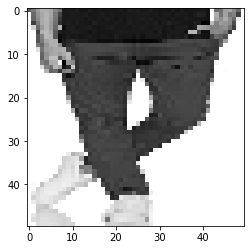

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # Sarees, Trousers and Jeans

        path = os.path.join(DATADIR,category)  # create path to sarees, trousers and jeans
        class_num = CATEGORIES.index(category)  # get the classification

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

In [7]:
print(len(training_data))

720


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
2
0
1
2
2


In [10]:
X = []
y = []

In [11]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [14]:
X[1]

array([[[ 90],
        [131],
        [179],
        ...,
        [167],
        [136],
        [215]],

       [[251],
        [134],
        [173],
        ...,
        [156],
        [110],
        [255]],

       [[255],
        [ 82],
        [153],
        ...,
        [137],
        [133],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)

In [15]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
y[1]

0

In [17]:

#Importing Libraries 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [18]:

#Normalization

X = X/255.0
X[1]

array([[[0.35294118],
        [0.51372549],
        [0.70196078],
        ...,
        [0.65490196],
        [0.53333333],
        [0.84313725]],

       [[0.98431373],
        [0.5254902 ],
        [0.67843137],
        ...,
        [0.61176471],
        [0.43137255],
        [1.        ]],

       [[1.        ],
        [0.32156863],
        [0.6       ],
        ...,
        [0.5372549 ],
        [0.52156863],
        [1.        ]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]])

In [19]:
X.shape

(720, 50, 50, 1)

In [20]:
print((X.shape, X.dtype))

((720, 50, 50, 1), dtype('float64'))


In [21]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [22]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [23]:
y = np.array(y)

In [24]:
y.dtype

dtype('int32')

In [25]:
model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

Epoch 1/30
21/21 [==============================] - 6s 215ms/step - loss: 0.1263 - accuracy: 0.3287 - val_loss: 1.8724 - val_accuracy: 0.3056
Epoch 2/30
21/21 [==============================] - 4s 173ms/step - loss: -0.5510 - accuracy: 0.3364 - val_loss: 1.2803 - val_accuracy: 0.3056
Epoch 3/30
21/21 [==============================] - 5s 261ms/step - loss: -2.2764 - accuracy: 0.3364 - val_loss: 6.8935 - val_accuracy: 0.3056
Epoch 4/30
21/21 [==============================] - 4s 179ms/step - loss: -9.6567 - accuracy: 0.3488 - val_loss: 16.0252 - val_accuracy: 0.3056
Epoch 5/30
21/21 [==============================] - 4s 165ms/step - loss: -29.6621 - accuracy: 0.3364 - val_loss: 12.3176 - val_accuracy: 0.3056
Epoch 6/30
21/21 [==============================] - 4s 181ms/step - loss: -124.4774 - accuracy: 0.3410 - val_loss: 121.8969 - val_accuracy: 0.3056
Epoch 7/30
21/21 [==============================] - 3s 165ms/step - loss: -372.3827 - accuracy: 0.3395 - val_loss: 527.5194 - val_accura

In [26]:
model.evaluate(X, y, verbose = 2)

23/23 - 1s - loss: -5.5133e+05 - accuracy: 0.3333


[-551334.6875, 0.3333333432674408]